# Time Series Forecasting

reference site : [Time Series Forecasting](https://h3imdallr.github.io/2017-08-19/arima/)

Analysis Gantry CPU using time Series with ARIMA

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# EDA: 시계열 데이터 확인하기 
import datetime 
from dateutil.relativedelta import relativedelta

import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [4]:
#df = pd.read_csv('../csv_data/datasets_20066_26008_portland-oregon-average-monthly-.csv', index_col='Month')
col_list = ['date', 'memory']    # 컬럼 선택
df = pd.read_csv('../csv_data/m_data.csv', usecols=col_list, index_col='date')
df.head()

,memory
date,
2020-06-29,0.374976
2020-06-29,0.374999
2020-06-29,0.374986
2020-06-29,0.375154
2020-06-29,0.375311


In [5]:
df.dropna(axis=0, inplace=True)
df.columns = ['memory']
print(df.head(), '\n...\n', df.tail())

              memory
date                
2020-06-29  0.374976
2020-06-29  0.374999
2020-06-29  0.374986
2020-06-29  0.375154
2020-06-29  0.375311 
...
               memory
date                
2020-07-10  0.537842
2020-07-10  0.538393
2020-07-10  0.539518
2020-07-10  0.539043
2020-07-10  0.539520


In [6]:
df = df.iloc[:-1]
print(df.tail())

              memory
date                
2020-07-10  0.537187
2020-07-10  0.537842
2020-07-10  0.538393
2020-07-10  0.539518
2020-07-10  0.539043


In [7]:
df.index = pd.to_datetime(df.index)
type(df.index); 
print(df.head(), '\n...\n', df.tail())

              memory
date                
2020-06-29  0.374976
2020-06-29  0.374999
2020-06-29  0.374986
2020-06-29  0.375154
2020-06-29  0.375311 
...
               memory
date                
2020-07-10  0.537187
2020-07-10  0.537842
2020-07-10  0.538393
2020-07-10  0.539518
2020-07-10  0.539043


In [8]:
time_window_l = datetime.datetime(2020, 6, 29)
time_window_r = datetime.datetime(2020, 7, 10)
temp_df = df[
    (df.index >= time_window_l)
    & (df.index <= time_window_r)
]
print(temp_df)

              memory
date                
2020-06-29  0.374976
2020-06-29  0.374999
2020-06-29  0.374986
2020-06-29  0.375154
2020-06-29  0.375311
...              ...
2020-07-10  0.537187
2020-07-10  0.537842
2020-07-10  0.538393
2020-07-10  0.539518
2020-07-10  0.539043

[1541 rows x 1 columns]


In [9]:
temp_df = df[:time_window_l]
print(temp_df)

              memory
date                
2020-06-29  0.374976
2020-06-29  0.374999
2020-06-29  0.374986
2020-06-29  0.375154
2020-06-29  0.375311
...              ...
2020-06-29  0.375652
2020-06-29  0.375768
2020-06-29  0.375644
2020-06-29  0.375976
2020-06-29  0.375710

[71 rows x 1 columns]


In [10]:
df['memory'] = df['memory'].astype(float)
print(df.dtypes)

memory    float64
dtype: object


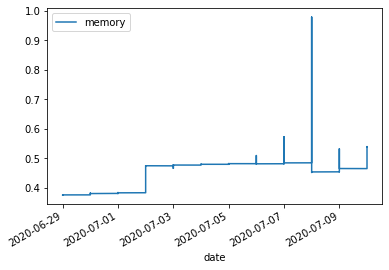

In [11]:
df.plot()

<Figure size 720x720 with 0 Axes>

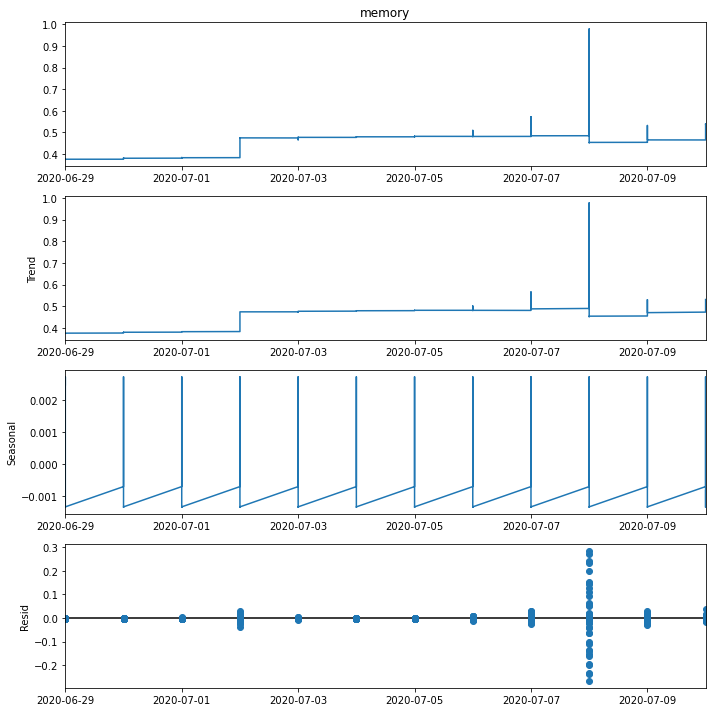

In [12]:
decomposition = seasonal_decompose(df['memory'], period=12)
plt.rcParams['figure.figsize'] = [10,10]
fig = plt.figure()
fig = decomposition.plot()

In [13]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    
    fig = plt.figure(figsize=(10, 6 ))
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    
    plt.legend(loc='best'); plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    print('<Results of Dickey-Fuller Test>')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],
                         index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
    

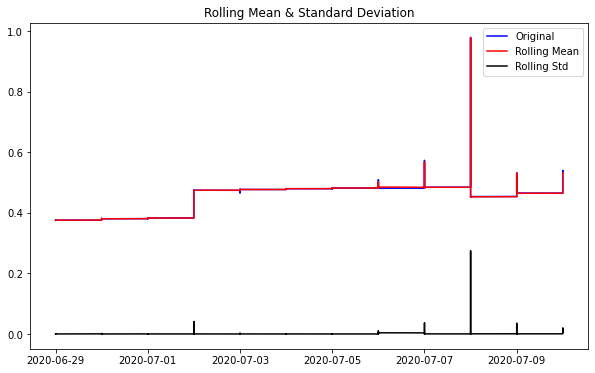

<Results of Dickey-Fuller Test>
Test Statistic                   -3.996525
p-value                           0.001429
#Lags Used                       15.000000
Number of Observations Used    1525.000000
Critical Value (1%)              -3.434645
Critical Value (5%)              -2.863437
Critical Value (10%)             -2.567780
dtype: float64


In [14]:
test_stationarity(df['memory'])

In [15]:
df['first_difference'] = df['memory'] - df['memory'].shift(1)

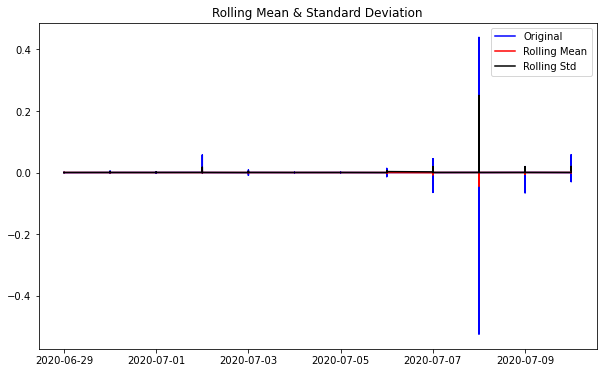

<Results of Dickey-Fuller Test>
Test Statistic                -9.760476e+00
p-value                        7.586877e-17
#Lags Used                     1.400000e+01
Number of Observations Used    1.525000e+03
Critical Value (1%)           -3.434645e+00
Critical Value (5%)           -2.863437e+00
Critical Value (10%)          -2.567780e+00
dtype: float64


In [16]:
test_stationarity(df.first_difference.dropna(inplace=False))

In [17]:
df['seasonal_first_difference'] = df['first_difference'] - df['first_difference'].shift(12)

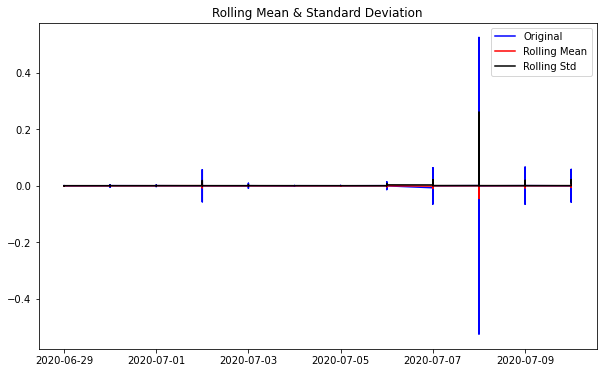

<Results of Dickey-Fuller Test>
Test Statistic                -1.015804e+01
p-value                        7.636982e-18
#Lags Used                     2.300000e+01
Number of Observations Used    1.504000e+03
Critical Value (1%)           -3.434705e+00
Critical Value (5%)           -2.863464e+00
Critical Value (10%)          -2.567794e+00
dtype: float64


In [18]:
test_stationarity(df.seasonal_first_difference.dropna(inplace=False))

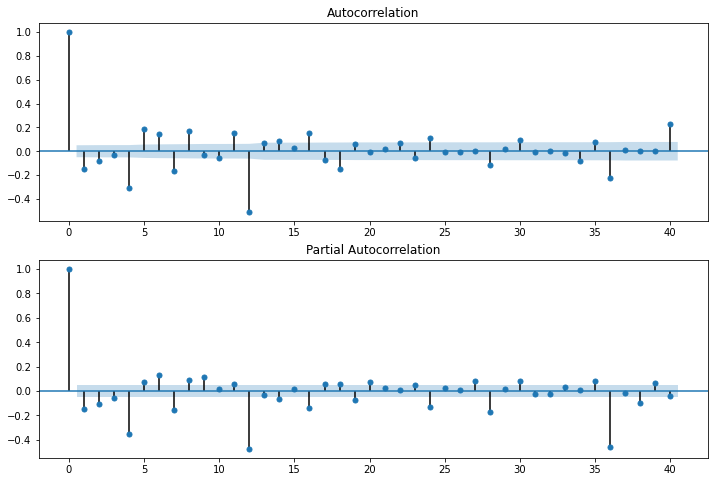

In [19]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df.seasonal_first_difference.iloc[13:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df.seasonal_first_difference.iloc[13:],lags=40,ax=ax2)

In [20]:
mod = sm.tsa.SARIMAX(df['memory'],order=(0,1,0), seasonal_order=(1,1,1,12))
results = mod.fit()
print (results.summary())

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                                      SARIMAX Results                                       
Dep. Variable:                               memory   No. Observations:                 1541
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                3404.527
Date:                              Fri, 10 Jul 2020   AIC                          -6803.054
Time:                                      05:58:28   BIC                          -6787.059
Sample:                                           0   HQIC                         -6797.101
                                             - 1541                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.0171      0.064     -0.267      0.789      -0.143       0.108
ma.S.L12      -0.99

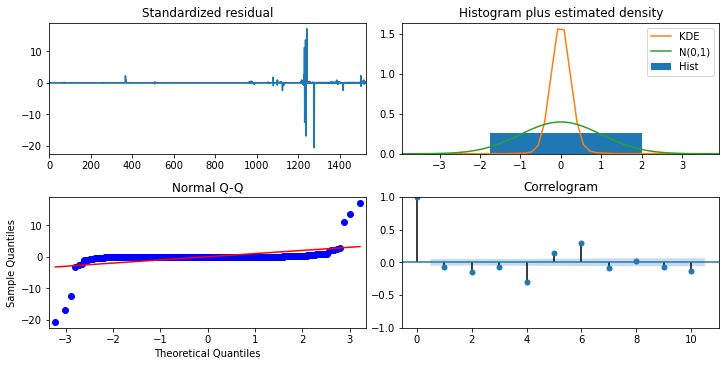

In [21]:
plt.rcParams['figure.figsize'] = [10,5]
results.plot_diagnostics();
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0);

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


,memory,first_difference,seasonal_first_difference,forecast
date,,,,
2020-07-10,0.492772,-0.000588,-0.000601,NaN
2020-07-10,0.493255,0.000483,-0.000400,NaN
2020-07-10,0.493206,-0.000049,-0.000255,NaN
2020-07-10,0.493295,0.000089,0.000038,NaN
2020-07-10,0.493289,-0.000007,0.000090,NaN
2020-07-10,0.493471,0.000183,-0.000122,NaN
2020-07-10,0.508113,0.014642,0.014885,NaN
2020-07-10,0.507871,-0.000242,-0.000810,NaN
2020-07-10,0.507690,-0.000181,0.000027,NaN


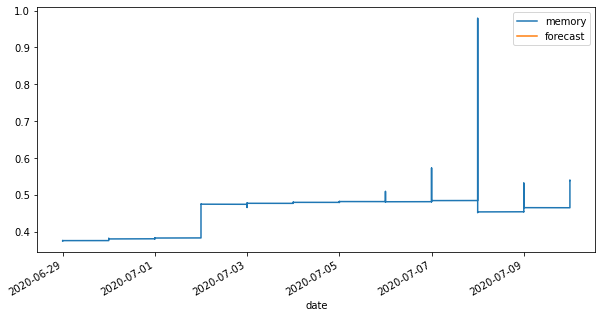

In [22]:
# 시계열 예측
df['forecast'] = results.predict(start = len(df)-12, end= len(df), dynamic= True)  
df[['memory', 'forecast']].plot()
df[-24:]

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


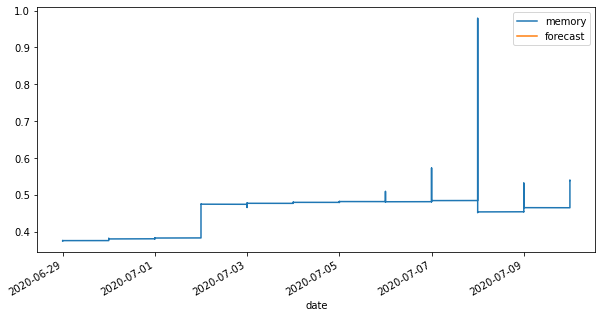

In [23]:
# 24 예측
df['forecast'] = results.predict(start = len(df)-24, end= len(df), dynamic= True)  
df[['memory', 'forecast']].plot()